<a href="https://colab.research.google.com/github/krishnareddyalavala/Data-Science-models/blob/main/Customer_segmentation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

data = {
    "age": [19,21,20,23,31,22,35,23,64,30,67,35,58,24,37,22,35,20,52,35],
    "annual_income": [15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34],
    "spending_score": [39,81,6,77,40,76,6,94,3,72,14,99,15,77,13,79,35,66,29,98]
}

df = pd.DataFrame(data)

df.to_csv("customers.csv", index=False)

df.head()


,age,annual_income,spending_score
0,19,15,39
1,21,16,81
2,20,17,6
3,23,18,77
4,31,19,40


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             20 non-null     int64
 1   annual_income   20 non-null     int64
 2   spending_score  20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


In [3]:
df.describe()

,age,annual_income,spending_score
count,20.000000,20.00000,20.000000
mean,33.650000,24.50000,50.950000
std,15.114563,5.91608,34.149016
min,19.000000,15.00000,3.000000
25%,22.000000,19.75000,14.750000
50%,30.500000,24.50000,53.000000
75%,35.500000,29.25000,77.500000
max,67.000000,34.00000,99.000000


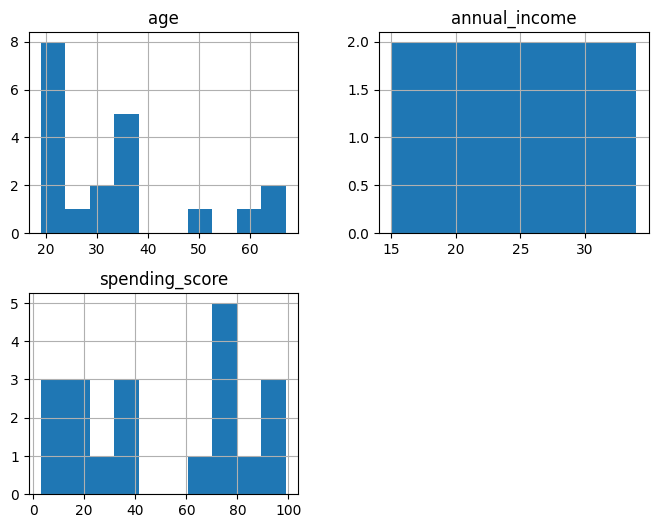

In [4]:
import matplotlib.pyplot as plt

df.hist(figsize=(8,6))
plt.show()


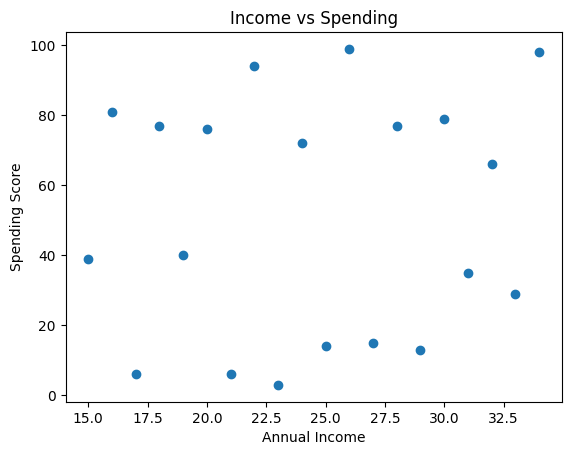

In [5]:
plt.figure()
plt.scatter(df["annual_income"], df["spending_score"])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Income vs Spending")
plt.show()


In [6]:
X = df[["age", "annual_income", "spending_score"]]


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
X_scaled[:5]

array([[-0.99444379, -1.64750894, -0.35902766],
       [-0.85868355, -1.47408695,  0.90282689],
       [-0.92656367, -1.30066495, -1.35048481],
       [-0.7229233 , -1.12724296,  0.78265027],
       [-0.17988232, -0.95382097, -0.32898351]])

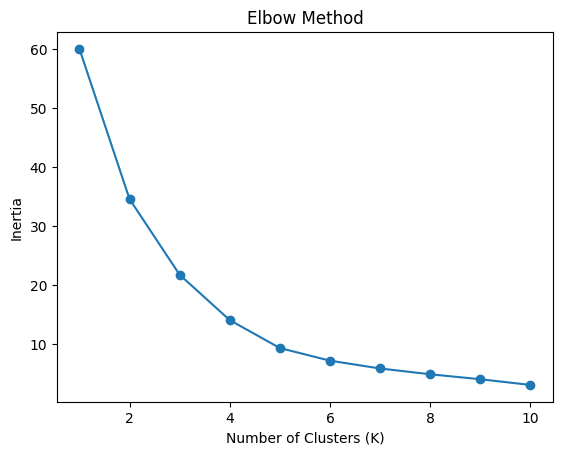

In [9]:
#Elobow method:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure()
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [10]:
#Applying k-means algorithm
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


In [12]:
df["cluster"] = clusters
df.head(10)


,age,annual_income,spending_score,cluster
0,19,15,39,2
1,21,16,81,0
2,20,17,6,2
3,23,18,77,0
4,31,19,40,2
5,22,20,76,0
6,35,21,6,2
7,23,22,94,0
8,64,23,3,1
9,30,24,72,0


In [13]:
df["cluster"].value_counts()


,count
cluster,
0,6
1,5
3,5
2,4


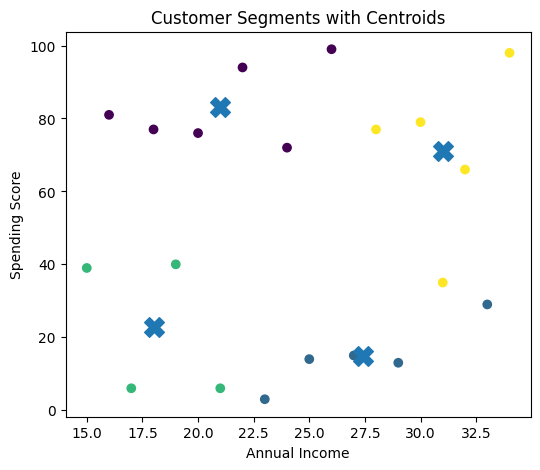

In [15]:
centers = kmeans.cluster_centers_

# centers are scaled — convert back to original scale
centers_original = scaler.inverse_transform(centers)

plt.figure(figsize=(6,5))

plt.scatter(df["annual_income"], df["spending_score"],
            c=df["cluster"])

plt.scatter(centers_original[:,1], centers_original[:,2],
            marker="X", s=200)

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segments with Centroids")
plt.show()


In [16]:
df.groupby("cluster").mean()

,age,annual_income,spending_score
cluster,,,
0,25.666667,21.0,83.166667
1,55.600000,27.4,14.800000
2,26.250000,18.0,22.750000
3,27.200000,31.0,71.000000
